In [85]:
import json
import matplotlib.pyplot as pplot
import numpy as np
import pandas as pd

In [86]:
MIL_metric_path = 'experiments/retrieval/default/bksnmovies_100m_coot_window51/metrics/'
NCE_metric_path = '../coot-videotext/experiments/retrieval/default/bksnmovies_100m_coot_NCE1/metrics/'
margin_metric_path = '../coot-videotext/experiments/retrieval/default/bksnmovies_100m_coot_margin1/metrics/'

In [87]:
MIL_step_metrics = json.load(open(MIL_metric_path+'metrics_step_41.json','r'))
NCE_step_metrics = json.load(open(NCE_metric_path+'metrics_step_39.json','r'))
margin_step_metrics = json.load(open(margin_metric_path+'metrics_step_22.json','r'))

In [88]:
MIL_epoch_metrics = json.load(open(MIL_metric_path+'metrics_epoch_41.json','r'))
NCE_epoch_metrics = json.load(open(NCE_metric_path+'metrics_epoch_39.json','r'))
margin_epoch_metrics = json.load(open(margin_metric_path+'metrics_epoch_22.json','r'))

In [89]:
MIL_loss_avg_metric = MIL_step_metrics['train_base/loss-avg']
NCE_loss_avg_metric = NCE_step_metrics['train_base/loss-avg']
margin_loss_avg_metric = margin_step_metrics['train_base/loss-avg']

In [90]:
margin_loss_avg_metric[-10:]

[[635, 0.015184476971626282],
 [636, 0.015184476971626282],
 [637, 0.015184476971626282],
 [638, 0.015056162141263485],
 [639, 0.015056162141263485],
 [640, 0.015056162141263485],
 [641, 0.015056162141263485],
 [642, 0.015056162141263485],
 [643, 0.015056162141263485],
 [644, 0.015056162141263485]]

In [91]:
NCE_loss_avg_metric[-10:]

[[1111, 39.299861907958984],
 [1112, 39.299861907958984],
 [1113, 39.299861907958984],
 [1114, 39.16986211140951],
 [1115, 39.16986211140951],
 [1116, 39.16986211140951],
 [1117, 39.16986211140951],
 [1118, 39.16986211140951],
 [1119, 39.16986211140951],
 [1120, 39.16986211140951]]

In [92]:
def get_arrays(metric, norm=False):
    steps = np.array([item[0] for item in metric])
    loss = np.array([item[1] for item in metric])
    if norm: loss = loss/np.max(loss)
    return steps, loss

In [93]:
MIL_steps, MIL_loss = get_arrays(MIL_loss_avg_metric, norm=True)

NCE_steps, NCE_loss = get_arrays(NCE_loss_avg_metric, norm=True)

margin_steps, margin_loss = get_arrays(margin_loss_avg_metric, norm=False)

Text(0, 0.5, 'loss')

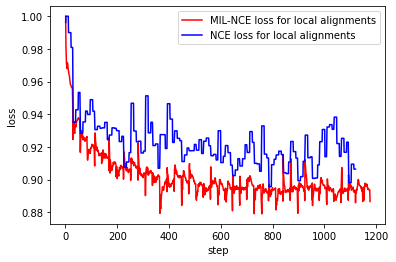

In [94]:
axes = pplot.axes()
axes.plot(MIL_steps, MIL_loss, 'r', label='MIL-NCE loss for local alignments')
axes.plot(NCE_steps, NCE_loss, 'b', label='NCE loss for local alignments')
#axes.plot(margin_steps, margin_loss, 'g', label='margin loss for local alignments')
axes.legend()
axes.set_xlabel('step')
axes.set_ylabel('loss')

Text(0, 0.5, 'loss')

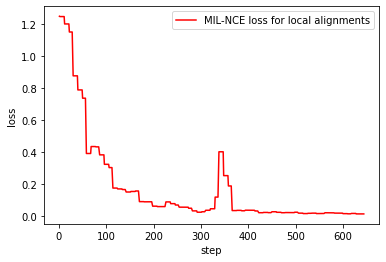

In [128]:
axes = pplot.axes()
axes.plot(margin_steps, margin_loss, 'r', label='MIL-NCE loss for local alignments')
#axes.plot(margin_steps, margin_loss, 'g', label='margin loss for local alignments')
axes.legend()
axes.set_xlabel('step')
axes.set_ylabel('loss')

In [186]:
def get_avg_loss(metric, n_steps):
    avgloss = []
    sumloss = 0
    for i, loss in enumerate(metric):
        if i%(n_steps) == 0 and i != 0:
            avgloss.append(sumloss/n_steps)
            sumloss= 0        
        sumloss += loss
    avgloss.append(sumloss/n_steps)
    return avgloss
        
    

In [187]:
MIL_steps, MIL_loss_unnorm = get_arrays(MIL_loss_avg_metric, norm=False)
NCE_steps, NCE_loss_unnorm = get_arrays(NCE_loss_avg_metric, norm=False)
margin_steps, margin_loss_unnorm = get_arrays(margin_loss_avg_metric, norm=False)

MIL_epoch_loss = get_avg_loss(MIL_loss_unnorm, 28)
NCE_epoch_loss = get_avg_loss(NCE_loss_unnorm, 28)
margin_epoch_loss = get_avg_loss(margin_loss_unnorm, 28)

MIL_epochs, MIL_val_loss = get_arrays(MIL_epoch_metrics['val_base/loss'])
NCE_epochs, NCE_val_loss = get_arrays(NCE_epoch_metrics['val_base/loss'])
margin_epochs, margin_val_loss = get_arrays(margin_epoch_metrics['val_base/loss'])

In [193]:
len(margin_loss_unnorm)/28

22.214285714285715

In [188]:
len(NCE_loss_unnorm)/28
count = 0
for i in range(len(NCE_loss_unnorm)):
    if i%28 == 0:
        count +=1
count +=1

In [189]:
count

40

In [194]:
NCE_val_loss

array([38.30941391, 38.16895294, 38.20692444, 38.06634521, 37.96442413,
       37.85036469, 37.75271606, 37.68669891, 37.6263504 , 37.75300598,
       37.83807373, 37.82916641, 37.63769913, 37.60551453, 37.77211761,
       37.68101501, 37.71440125, 37.72253036, 37.72716522, 37.66364288,
       37.60567474, 37.61610413, 37.61930847, 37.5959816 , 37.60629654,
       37.63124084, 37.64268112, 37.62985992, 37.64697266, 37.66145325,
       37.64739609, 37.6448288 , 37.64149475, 37.6403389 , 37.64733124,
       37.64662933, 37.64374161, 37.64528656, 37.65016174, 37.6495285 ])

In [195]:
NCE_epoch_loss

[42.84832896505083,
 40.71280288696289,
 40.40862060728528,
 40.73420742579869,
 40.262192544483,
 40.20120661599295,
 40.20871752784366,
 39.803861390976685,
 39.84870719909668,
 40.07187670753116,
 40.159681955973305,
 40.06866357440041,
 39.78056560243879,
 40.32617998123169,
 40.15520193463281,
 39.669741403488885,
 39.654053324744815,
 39.77619025820777,
 39.85464168730236,
 39.6344898995899,
 39.66823162351336,
 39.635723023187545,
 39.14193239666167,
 39.41496771857852,
 39.875033741905575,
 39.33889906747,
 39.778654370989116,
 39.1210538319179,
 39.56590706961496,
 39.19560287112282,
 39.583318437848774,
 39.201951435634065,
 39.507358414786204,
 39.2251626423427,
 40.00838992709206,
 40.36544436500186,
 39.85536729721797,
 39.40694645472935,
 23.828130494980588]

Text(0.5, 1.0, 'Training')

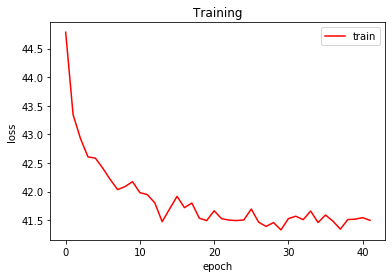

In [220]:

axes = pplot.axes()
axes.plot(MIL_epochs, MIL_epoch_loss, 'r', label='train')
axes.legend()
axes.set_xlabel('epoch')
axes.set_ylabel('loss')
axes.set_title('Training')

Text(0.5, 1.0, 'validation')

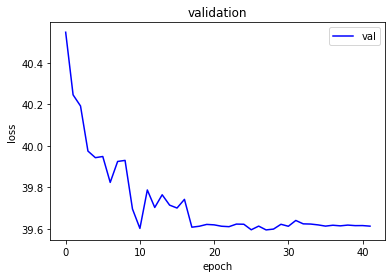

In [221]:
axes = pplot.axes()
axes.plot(MIL_epochs, MIL_val_loss, 'b', label='val')
axes.legend()
axes.set_xlabel('epoch')
axes.set_ylabel('loss')
axes.set_title('validation')

Text(0.5, 1.0, 'NCE')

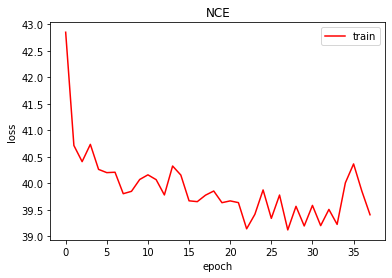

In [202]:
axes = pplot.axes()
axes.plot(NCE_epochs[:-2], NCE_epoch_loss[:-1], 'r', label='train')
axes.legend()
axes.set_xlabel('epoch')
axes.set_ylabel('loss')
axes.set_title('NCE')

Text(0.5, 1.0, 'training')

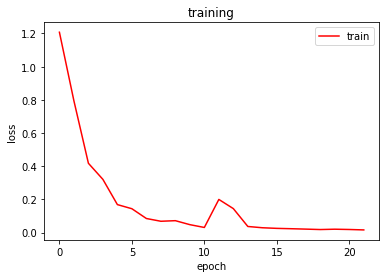

In [224]:
axes = pplot.axes()
axes.plot(margin_epochs[:-1], margin_epoch_loss[:-1], 'r', label='train')
axes.legend()
axes.set_xlabel('epoch')
axes.set_ylabel('loss')
axes.set_title('training')

Text(0.5, 1.0, 'validation')

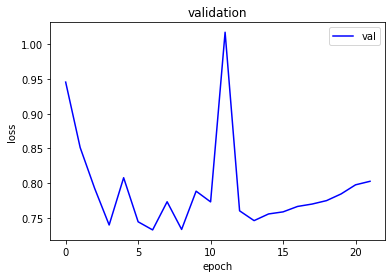

In [223]:
axes = pplot.axes()
axes.plot(margin_epochs[:-1], margin_val_loss[:-1], 'b', label='val')
axes.legend()
axes.set_xlabel('epoch')
axes.set_ylabel('loss')
axes.set_title('validation')

ValueError: x and y must have same first dimension, but have shapes (40,) and (39,)

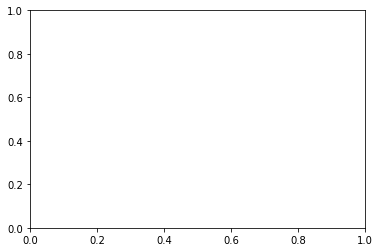

In [166]:
axes = pplot.axes()
axes.plot(NCE_epochs, NCE_epoch_loss, 'r', label='train')
axes.plot(NCE_epochs, NCE_val_loss, 'b', label='validation')
axes.legend()
axes.set_xlabel('step')
axes.set_ylabel('loss')
axes.set_title('NCE')

In [96]:
MIL_epoch_metrics.keys()

dict_keys(['train_base/epoch', 'ztime/time_total', 'ztime/time_val', 'val_base/loss', 'val_base/best_field', 'val/loss_cc', 'val/loss_contr', 'val_base/vid2par-r1', 'val_ret/vid2par-r5', 'val_ret/vid2par-r10', 'val_ret/vid2par-r50', 'val_ret/vid2par-medr', 'val_ret/vid2par-meanr', 'val_base/par2vid-r1', 'val_ret/par2vid-r5', 'val_ret/par2vid-r10', 'val_ret/par2vid-r50', 'val_ret/par2vid-medr', 'val_ret/par2vid-meanr'])

In [227]:
MIL_ret5 = MIL_epoch_metrics['val_ret/vid2par-r5']
NCE_ret5 = NCE_epoch_metrics['val_ret/vid2par-r5']
margin_ret5 = margin_epoch_metrics['val_ret/vid2par-r5']

MIL_steps, MIL_ret5 = get_arrays(MIL_ret5, norm=False)
NCE_steps, NCE_ret5 = get_arrays(NCE_ret5, norm=False)
margin_steps, margin_ret5 = get_arrays(margin_ret5, norm=False)

Text(0, 0.5, 'recall at 5')

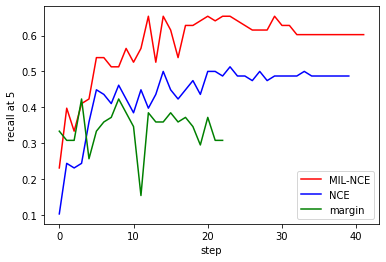

In [229]:
axes = pplot.axes()
axes.plot(MIL_steps, MIL_ret5, 'r', label='MIL-NCE')
axes.plot(NCE_steps, NCE_ret5, 'b', label='NCE')
axes.plot(margin_steps, margin_ret5, 'g', label='margin')
axes.legend()
axes.set_xlabel('step')
axes.set_ylabel('recall at 5')

In [99]:
MIL_ret1 = MIL_epoch_metrics['val_base/vid2par-r1']
NCE_ret1 = NCE_epoch_metrics['val_base/vid2par-r1']
margin_ret1 = margin_epoch_metrics['val_base/vid2par-r1']

MIL_steps, MIL_ret1 = get_arrays(MIL_ret1, norm=False)
NCE_steps, NCE_ret1 = get_arrays(NCE_ret1, norm=False)
margin_steps, margin_ret1 = get_arrays(margin_ret1, norm=False)

Text(0, 0.5, 'recall at 1')

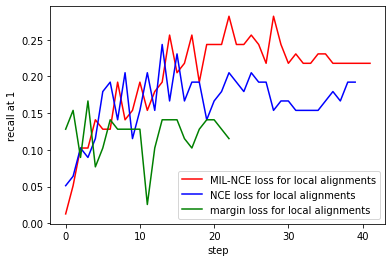

In [100]:
axes = pplot.axes()
axes.plot(MIL_steps, MIL_ret1, 'r', label='MIL-NCE loss for local alignments')
axes.plot(NCE_steps, NCE_ret1, 'b', label='NCE loss for local alignments')
axes.plot(margin_steps, margin_ret1, 'g', label='margin loss for local alignments')
axes.legend()
axes.set_xlabel('step')
axes.set_ylabel('recall at 1')

In [101]:
MIL_ret10 = MIL_epoch_metrics['val_ret/vid2par-r10']
NCE_ret10 = NCE_epoch_metrics['val_ret/vid2par-r10']
margin_ret10 = margin_epoch_metrics['val_ret/vid2par-r10']

MIL_steps, MIL_ret10 = get_arrays(MIL_ret10, norm=False)
NCE_steps, NCE_ret10 = get_arrays(NCE_ret10, norm=False)
margin_steps, margin_ret10 = get_arrays(margin_ret10, norm=False)

In [102]:
MIL_ret10

array([0.32051282, 0.61538462, 0.57692308, 0.6025641 , 0.66666667,
       0.65384615, 0.70512821, 0.67948718, 0.69230769, 0.74358974,
       0.69230769, 0.71794872, 0.80769231, 0.71794872, 0.74358974,
       0.74358974, 0.69230769, 0.71794872, 0.73076923, 0.74358974,
       0.74358974, 0.73076923, 0.75641026, 0.74358974, 0.75641026,
       0.74358974, 0.75641026, 0.74358974, 0.74358974, 0.71794872,
       0.71794872, 0.75641026, 0.74358974, 0.74358974, 0.74358974,
       0.74358974, 0.74358974, 0.74358974, 0.74358974, 0.74358974,
       0.74358974, 0.74358974])

Text(0, 0.5, 'recall at 1')

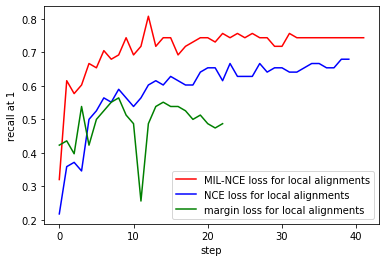

In [103]:
axes = pplot.axes()
axes.plot(MIL_steps, MIL_ret10, 'r', label='MIL-NCE loss for local alignments')
axes.plot(NCE_steps, NCE_ret10, 'b', label='NCE loss for local alignments')
axes.plot(margin_steps, margin_ret10, 'g', label='margin loss for local alignments')
axes.legend()
axes.set_xlabel('step')
axes.set_ylabel('recall at 1')

In [230]:
recall_df = pd.DataFrame(
    {'margin':[margin_ret1[-1], margin_ret5[-1], margin_ret10[-1]],
     'NCE':[NCE_ret1[-1], NCE_ret5[-1], MIL_ret10[-1]],
     'MIL-NCE':[MIL_ret1[-1], MIL_ret5[-1], MIL_ret10[-1]],
    'youcook2 pretraining':[0.013, 0.231, 0.321]})
recall_df.index = ['recall at 1', 'recall at 5', 'recall at 10']

In [231]:
recall_df

,margin,NCE,MIL-NCE,youcook2 pretraining
recall at 1,0.115385,0.166667,0.294872,0.013
recall at 5,0.307692,0.487179,0.602564,0.231
recall at 10,0.525641,0.717949,0.717949,0.321


Bbox(x0=-0.25, y0=0.0, x1=-0.125, y1=0.11538461538461539)
Bbox(x0=0.75, y0=0.0, x1=0.875, y1=0.3076923076923077)
Bbox(x0=1.75, y0=0.0, x1=1.875, y1=0.5256410256410257)
Bbox(x0=-0.125, y0=0.0, x1=0.0, y1=0.16666666666666666)
Bbox(x0=0.875, y0=0.0, x1=1.0, y1=0.48717948717948717)
Bbox(x0=1.875, y0=0.0, x1=2.0, y1=0.717948717948718)
Bbox(x0=0.0, y0=0.0, x1=0.125, y1=0.2948717948717949)
Bbox(x0=1.0, y0=0.0, x1=1.125, y1=0.6025641025641025)
Bbox(x0=2.0, y0=0.0, x1=2.125, y1=0.717948717948718)
Bbox(x0=0.125, y0=0.0, x1=0.25, y1=0.013)
Bbox(x0=1.125, y0=0.0, x1=1.25, y1=0.231)
Bbox(x0=2.125, y0=0.0, x1=2.25, y1=0.321)


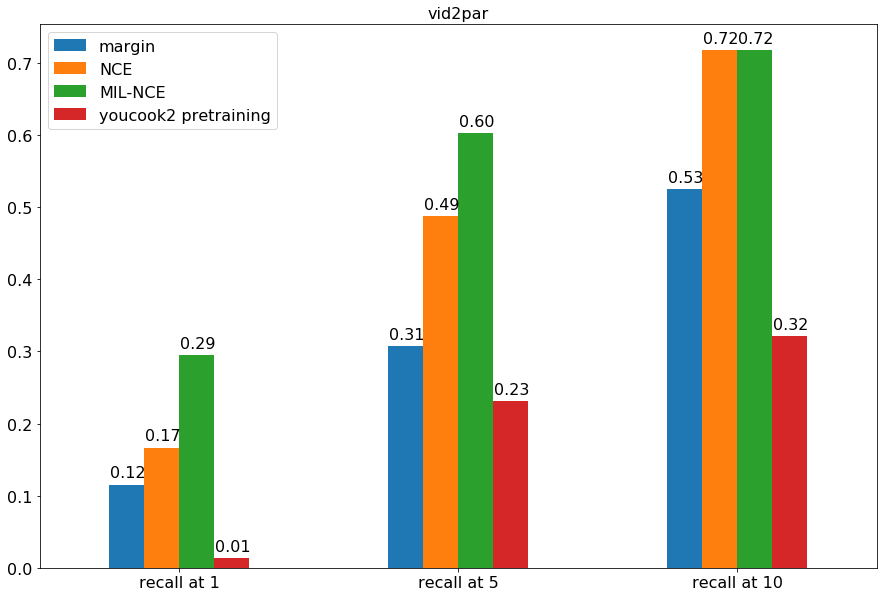

In [232]:
ax = recall_df.plot.bar(rot=0, figsize=(15,10), fontsize=16)
ax.legend(fontsize=16)
ax.set_title('vid2par', fontsize=16)
x_offset = -0.06
y_offset = 0.01


for p in ax.patches:
    b = p.get_bbox()
    print(b)
    val = "{:.2f}".format(b.y1 + b.y0)        
    ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset), fontsize=16)


In [107]:
MIL_ret1 = MIL_epoch_metrics['val_base/par2vid-r1']
NCE_ret1 = NCE_epoch_metrics['val_base/par2vid-r1']
margin_ret1 = margin_epoch_metrics['val_base/par2vid-r1']

MIL_steps, MIL_ret1 = get_arrays(MIL_ret1, norm=False)
NCE_steps, NCE_ret1 = get_arrays(NCE_ret1, norm=False)
margin_steps, margin_ret1 = get_arrays(margin_ret1, norm=False)


MIL_ret5 = MIL_epoch_metrics['val_ret/par2vid-r5']
NCE_ret5 = NCE_epoch_metrics['val_ret/par2vid-r5']
margin_ret5 = margin_epoch_metrics['val_ret/par2vid-r5']

MIL_steps, MIL_ret5 = get_arrays(MIL_ret5, norm=False)
NCE_steps, NCE_ret5 = get_arrays(NCE_ret5, norm=False)
margin_steps, margin_ret5 = get_arrays(margin_ret5, norm=False)

MIL_ret10 = MIL_epoch_metrics['val_ret/par2vid-r10']
NCE_ret10 = NCE_epoch_metrics['val_ret/par2vid-r10']
margin_ret10 = margin_epoch_metrics['val_ret/par2vid-r10']

MIL_steps, MIL_ret10 = get_arrays(MIL_ret10, norm=False)
NCE_steps, NCE_ret10 = get_arrays(NCE_ret10, norm=False)
margin_steps, margin_ret10 = get_arrays(margin_ret10, norm=False)



In [108]:
recall_df = pd.DataFrame(
    {'margin':[margin_ret1[-1], margin_ret5[-1], margin_ret10[-1]],
     'NCE':[NCE_ret1[-1], NCE_ret5[-1], MIL_ret10[-1]],
     'MIL-NCE':[MIL_ret1[-1], MIL_ret5[-1], MIL_ret10[-1]]})
recall_df.index = ['recall at 1', 'recall at 5', 'recall at 10']

Bbox(x0=-0.25, y0=0.0, x1=-0.08333333333333334, y1=0.11538461538461539)
Bbox(x0=0.75, y0=0.0, x1=0.9166666666666666, y1=0.3076923076923077)
Bbox(x0=1.75, y0=0.0, x1=1.9166666666666667, y1=0.5256410256410257)
Bbox(x0=-0.08333333333333333, y0=0.0, x1=0.08333333333333333, y1=0.16666666666666666)
Bbox(x0=0.9166666666666666, y0=0.0, x1=1.0833333333333333, y1=0.5384615384615384)
Bbox(x0=1.9166666666666667, y0=0.0, x1=2.0833333333333335, y1=0.717948717948718)
Bbox(x0=0.08333333333333331, y0=0.0, x1=0.24999999999999994, y1=0.2948717948717949)
Bbox(x0=1.0833333333333333, y0=0.0, x1=1.25, y1=0.6282051282051282)
Bbox(x0=2.083333333333333, y0=0.0, x1=2.2499999999999996, y1=0.717948717948718)


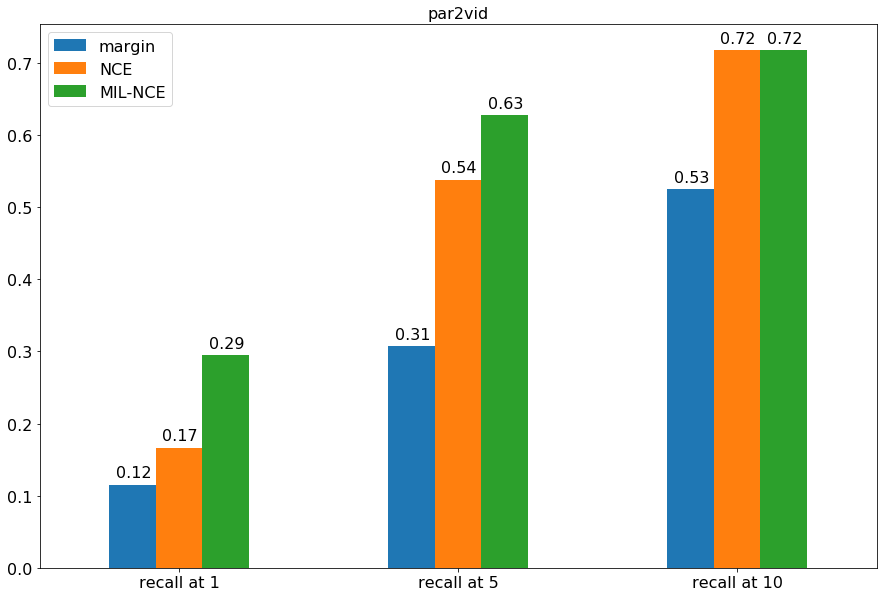

In [109]:
ax = recall_df.plot.bar(rot=0, figsize=(15,10), fontsize=16)
ax.legend(fontsize=16)
ax.set_title('par2vid', fontsize=16)
x_offset = -0.06
y_offset = 0.01

for p in ax.patches:
    b = p.get_bbox()
    print(b)
    val = "{:.2f}".format(b.y1 + b.y0)        
    ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset), fontsize=16)
